In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [2]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
sns.set_style("white")

## EDA RAW DATA

In [3]:
train = pd.read_csv('../data/raw/acquisition_train.csv') 
test = pd.read_csv('../data/raw/acquisition_test.csv')
train['dataset'] = 'train'
test['dataset'] = 'test'

In [4]:
data = pd.concat([train, test], sort=False).reset_index(drop=True)

### 1. ids

In [5]:
data.ids.describe()

count                                    64592
unique                                   64592
top       8b4c6861-5251-1ae5-c218-ce9c0c1dd026
freq                                         1
Name: ids, dtype: object

É um identificador único.

### 2. score_1, score_2

In [6]:
score_cols = ['score_1', 'score_2']
data[score_cols].describe().transpose()

,count,unique,top,freq
score_1,63807,7,DGCQep2AE5QRkNCshIAlFQ==,21029
score_2,63807,35,osCzpM4hJrxugqWWuZmMWw==,5202


In [7]:
data[score_cols].isna().sum()

score_1    785
score_2    785
dtype: int64

As features `score_1` e `score_2` são categoricas com 562 valores faltantes.

### 3. score_3, score_4, score_5, score_6

In [8]:
score_cols = ['score_3', 'score_4', 'score_5', 'score_6']
data[score_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score_3,63807.0,348.031877,110.064626,0.000000,270.000000,340.000000,420.000000,990.000000
score_4,64592.0,99.997870,3.170869,86.191572,97.858659,100.006042,102.131648,113.978234
score_5,64592.0,0.499220,0.288769,0.000035,0.250295,0.498237,0.749190,0.999982
score_6,64592.0,99.942719,10.034220,60.663039,93.210322,99.975654,106.698884,142.430069


In [9]:
data[score_cols].isna().sum()

score_3    785
score_4      0
score_5      0
score_6      0
dtype: int64

In [10]:
plot_data = pd.DataFrame(minmax_scale(data[score_cols]), columns=score_cols)
plot_data = pd.melt(plot_data, value_vars=score_cols).dropna()

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


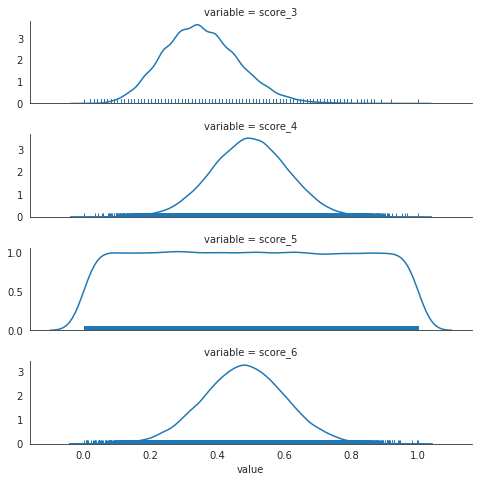

In [11]:
g = sns.FacetGrid(plot_data, row="variable", height=1.7, aspect=4, sharey="none")
g.map(sns.distplot, "value", hist=False, rug=True);

In [12]:
data['score_3'].fillna(data.score_3.mean(), inplace=True)

### 4. risk_rate

In [13]:
data.risk_rate.describe()

count    63807.000000
mean         0.296404
std          0.101549
min          0.000000
25%          0.220000
50%          0.290000
75%          0.360000
max          0.900000
Name: risk_rate, dtype: float64

In [14]:
data.risk_rate.isna().sum()

785

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


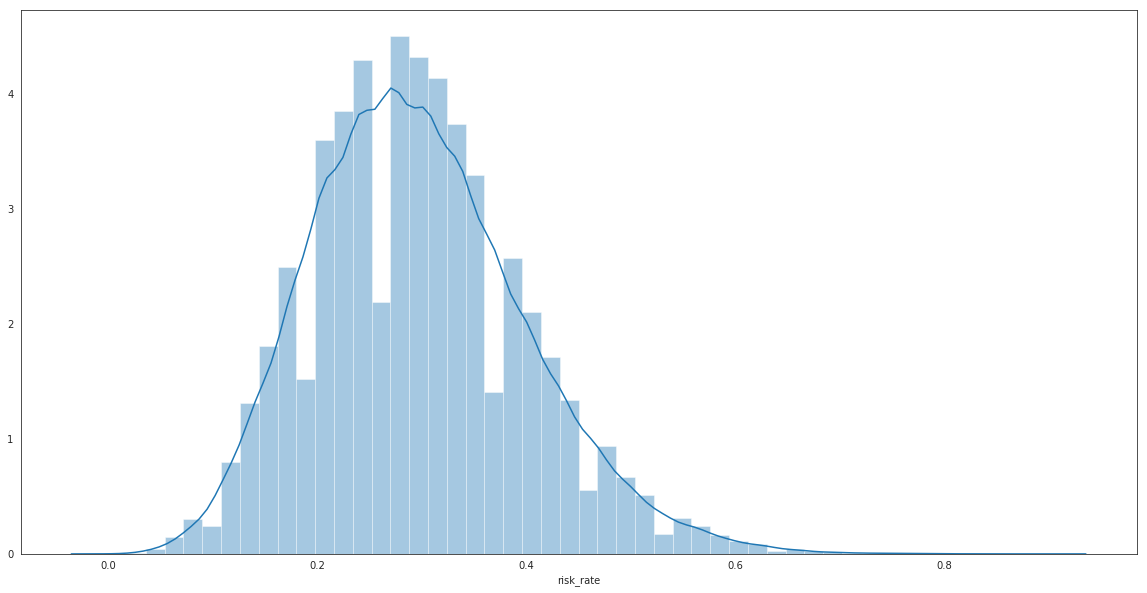

In [15]:
sns.distplot(data.risk_rate.dropna())

In [16]:
data['risk_rate'].fillna(data.risk_rate.mean(), inplace = True)

### 4. last_amount_borrowed, last_borrowed_in_months

In [17]:
borrow_cols = ['last_amount_borrowed', 'last_borrowed_in_months']

In [18]:
data[borrow_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
last_amount_borrowed,21643.0,13811.507536,8078.113639,730.05,7524.98,12024.21,19218.025,35059.6
last_borrowed_in_months,21643.0,41.798457,10.273546,36.00,36.00,36.00,36.000,60.0


/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


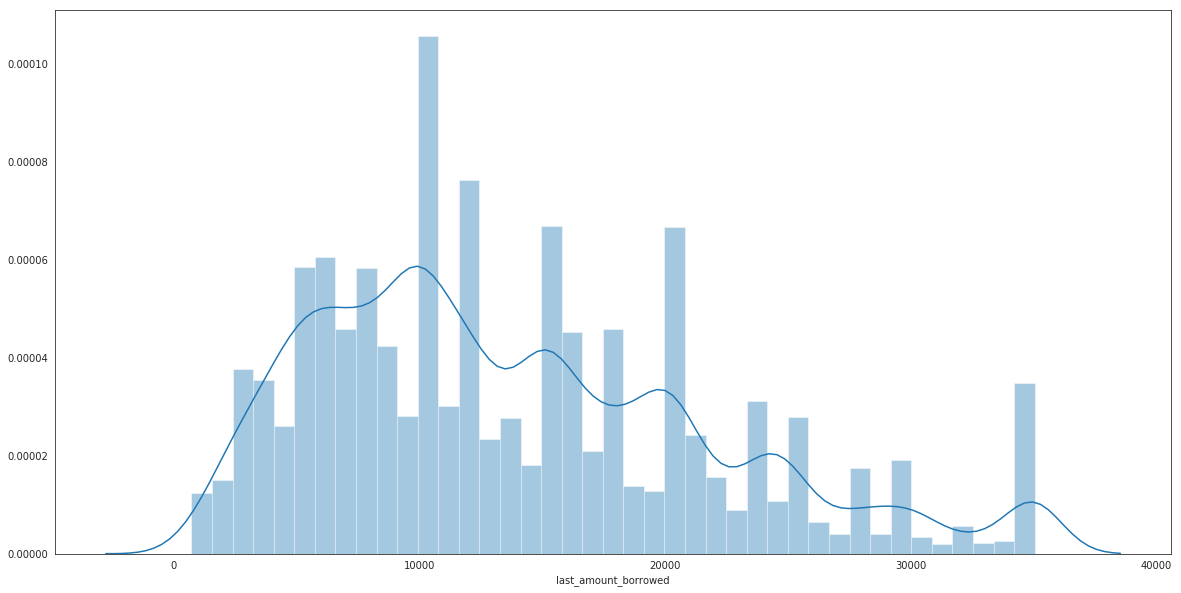

In [19]:
sns.distplot(data.last_amount_borrowed.dropna())

In [20]:
data.last_borrowed_in_months.dropna().value_counts()

36.0    16414
60.0     5229
Name: last_borrowed_in_months, dtype: int64

In [21]:
data[borrow_cols].isna().sum()

last_amount_borrowed       42949
last_borrowed_in_months    42949
dtype: int64

Nesses casos os valores nulos vão ser substituidos por 0 pois ira separar bem eles dos outros valores.

In [22]:
for col in borrow_cols:
    data[col].fillna(0, inplace=True)

## 5. credit_limit

In [23]:
data.credit_limit.describe()

count     44839.000000
mean      34562.007560
std       37041.867093
min           0.000000
25%       10000.000000
50%       25775.000000
75%       47326.500000
max      613117.000000
Name: credit_limit, dtype: float64

In [24]:
data.credit_limit.isna().sum()

19753

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


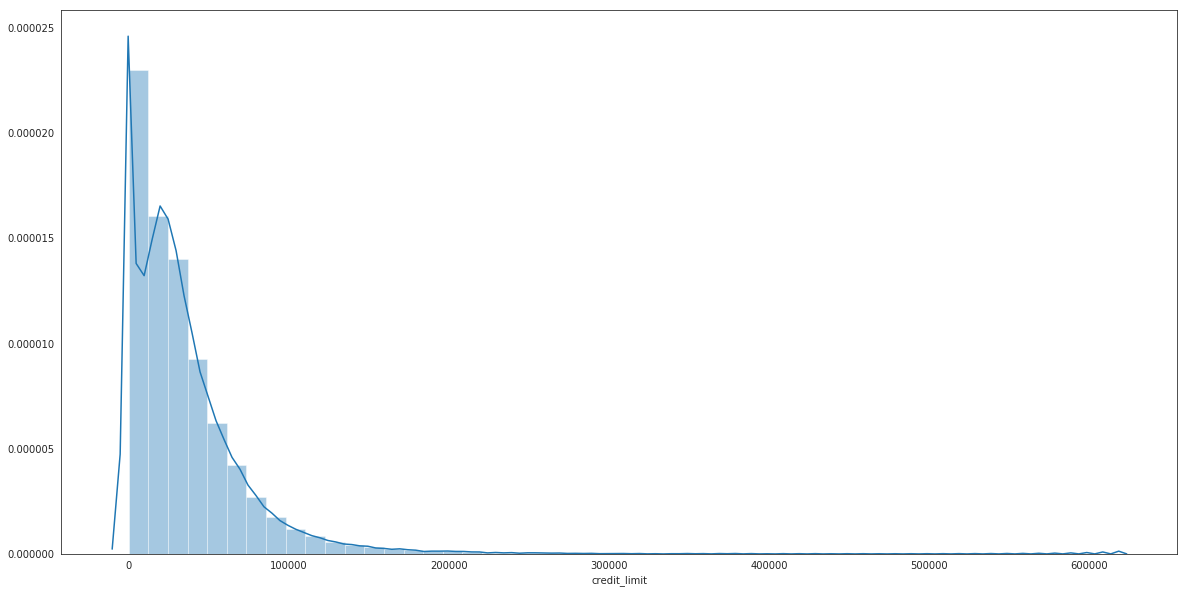

In [25]:
sns.distplot(data.credit_limit.dropna())

Esse caso não da pra dar o valor 0 para os clientes, um valor que diferencie bastante e não conflita com a distribuição é necessário.

In [26]:
data['credit_limit'].fillna(-999, inplace=True)

## 6. reason

Razão pela qual foi feita uma consulta naquele cpf

- comparar se os mesmos se encontram no test

In [27]:
data.reason.describe()

count                                                 63801
unique                                                20345
top       mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
freq                                                   6510
Name: reason, dtype: object

In [28]:
data.reason.str.len().describe()

count    63801.0
mean       128.0
std          0.0
min        128.0
25%        128.0
50%        128.0
75%        128.0
max        128.0
Name: reason, dtype: float64

In [29]:
data['reason'].fillna('NA', inplace=True)

## 7. income

Renda estimada pelo provedor dos dados para o aplicante


In [30]:
data.income.describe()

count    6.380700e+04
mean     7.180972e+04
std      5.124993e+04
min      4.821180e+03
25%      4.501336e+04
50%      6.139916e+04
75%      8.602645e+04
max      5.000028e+06
Name: income, dtype: float64

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


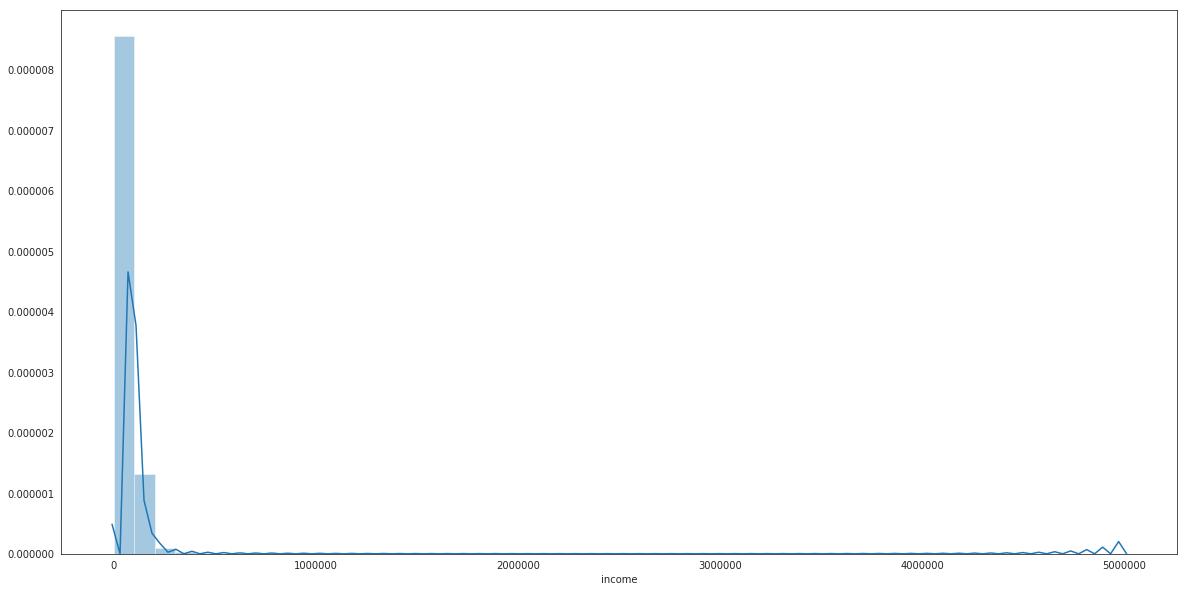

In [31]:
sns.distplot(data.income.dropna())
plt.show()

In [32]:
data.income.isna().sum()

785

In [33]:
data['income'].fillna(-999, inplace=True)

## 8. facebook_profile

Se o aplicante possui perfil no Facebook

In [34]:
data.facebook_profile.describe()

count     58185
unique        2
top       False
freq      35824
Name: facebook_profile, dtype: object

In [35]:
data.facebook_profile.value_counts()

False    35824
True     22361
Name: facebook_profile, dtype: int64

In [36]:
data['facebook_profile'].fillna(-1, inplace=True)

## 9. state

Estado de residência do aplicante

In [37]:
data.state.describe()

count                        63807
unique                          50
top       xsd3ZdsI3356I3xMxZeiqQ==
freq                         10656
Name: state, dtype: object

In [38]:
data.state.value_counts()

xsd3ZdsI3356I3xMxZeiqQ==    10656
BB/zpwTH+8GCIVHlhzOU1Q==     5645
sjJbkqJS7cXalHLBFA+EOQ==     4790
1DpYl6dtzY0qE33poow3iw==     4418
x6Gw/1I8t3KPgT6s82Kodg==     2579
kfFcVGcsJmH2n3eYprLkeQ==     2486
JrdZzPZEa/YIIGwh8OdTKA==     2205
GW2VZ3dN3OGHSjQ6JkfqQw==     2077
7bX4XFXmYqoMspxup0CrKA==     2020
82aTqSzrTImY+SbAOBQzGQ==     1977
0lQuvmygO68ZFXZjzHEOww==     1669
Ygq6MsM98oC8yceExr69Ig==     1603
1vMmtGURgMcjxQbV2KQiUw==     1505
fR2lwAMjCb/fNXjsApiOTw==     1496
rrVbgRNTRyB6auEycsRrpA==     1480
/EoxQEzy1PWWTtv6DNwr2w==     1450
bNDXnbe7XAx/VUe+cbjDiw==     1315
VafbDA6D5W2TpGMAUJbW8Q==     1063
5hPtRY8gW/3+fPXvGIgWTg==     1061
1xxlFOWSFxK0/J2VdCKP3g==      996
OCoEDgPLpDjHcbEmPpAjvA==      934
/L8vvVesB5WyAv190Hw/rQ==      839
QCVqG0wT4xPLQuiTIExO2w==      784
ygE7OTdsxRMLeXMa0EZwZw==      766
ZUmHOp1/xBWh5O/uqDutsw==      729
KET/Pmr6rHp1RJ/P9ymztw==      727
qItmSqWrjm+MopDA+UpKRw==      660
orU7WJYGPT/xFwOXY1eBkw==      580
/78Q+NAqnsdbiE2JReYK9Q==      569
ZVfsutsd1Go0zZ

## 10. zip

Código postal do aplicante

In [39]:
data.zip.describe()

count                        63807
unique                         830
top       3k2JCQ8Bp5oDwaI39ZJgHA==
freq                           813
Name: zip, dtype: object

In [40]:
data.zip.value_counts().head()

3k2JCQ8Bp5oDwaI39ZJgHA==    813
8REhu8TWlarYwZKjbn1BNA==    721
iY2cULhh/NFBaiOCRferZQ==    682
LqsmduGRTUSbhLbKf30e8A==    663
Kihc6OKBTIHsGwCQy2Vruw==    647
Name: zip, dtype: int64

## 11. shipping_zip_code

Código do endereço de entrega

In [41]:
data.shipping_zip_code.describe()

count    64592.000000
mean     33930.017773
std      12680.019853
min      12001.000000
25%      22959.000000
50%      33844.500000
75%      44911.000000
max      56000.000000
Name: shipping_zip_code, dtype: float64

In [42]:
data.shipping_zip_code.nunique()

33915

In [43]:
# TRANSFORM TO CATEGORICAL

## 12. shipping_state

Estado do endereço de entrega


In [44]:
data.shipping_state.describe()

count     64592
unique       25
top       BR-SP
freq      10051
Name: shipping_state, dtype: object

In [45]:
data.shipping_state.value_counts()

BR-SP    10051
BR-AM     5828
BR-BA     3936
BR-GO     3741
BR-RR     2301
BR-MG     2190
BR-SE     2002
BR-MA     1995
BR-DF     1983
BR-PR     1969
BR-RO     1960
BR-TO     1955
BR-PA     1937
BR-RS     1934
BR-MT     1926
BR-AP     1920
BR-MS     1919
BR-PE     1900
BR-PB     1896
BR-RN     1889
BR-SC     1880
BR-AC     1878
BR-ES     1877
BR-AL     1864
BR-CE     1861
Name: shipping_state, dtype: int64

## 13. channel

Canal pelo qual o aplicante aplicou

- Valor único, 

In [46]:
data.channel.isna().sum()

785

In [47]:
data.channel.describe()

count                        63807
unique                           1
top       NCqL3QBx0pscDnx3ixKwXg==
freq                         63807
Name: channel, dtype: object

In [48]:
data.channel.value_counts()

NCqL3QBx0pscDnx3ixKwXg==    63807
Name: channel, dtype: int64

## 14. job_name

Profissão do aplicante

In [49]:
colname = 'job_name'
data[colname].isna().sum()

4795

In [50]:
data[colname].describe()

count                                                 59797
unique                                                44604
top       mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...
freq                                                    244
Name: job_name, dtype: object

In [51]:
data[colname].value_counts().head()

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=    244
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=    172
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=    164
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIS7jap0hM5abNdcL6dk7Ifw=    116
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIfeSCTDWhw2hS0GDfQEUVwM=    114
Name: job_name, dtype: int64

## 15. real_state

Informação sobre habitação do aplicante

In [52]:
colname = 'real_state'
data[colname].isna().sum()

785

In [53]:
data[colname].describe()

count                        63807
unique                           5
top       N5/CE7lSkAfB04hVFFwllw==
freq                         32105
Name: real_state, dtype: object

In [54]:
data[colname].value_counts().head()

N5/CE7lSkAfB04hVFFwllw==    32105
n+xK9CfX0bCn77lClTWviw==    26466
nSpvDsIsslUaX6GE6m6eQA==     5170
UX7AdFYgQh+VrVC5eIaU9w==       53
+qWF9pJpVGtTFn4vFjb/cg==       13
Name: real_state, dtype: int64

## 16. ok_since

Quantidade de dias que???

In [55]:
colname = 'ok_since'
data[colname].isna().sum()

38038

In [56]:
data[colname].describe()

count    26554.000000
mean        35.174249
std         21.663679
min          0.000000
25%         17.000000
50%         32.000000
75%         50.000000
max        141.000000
Name: ok_since, dtype: float64

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


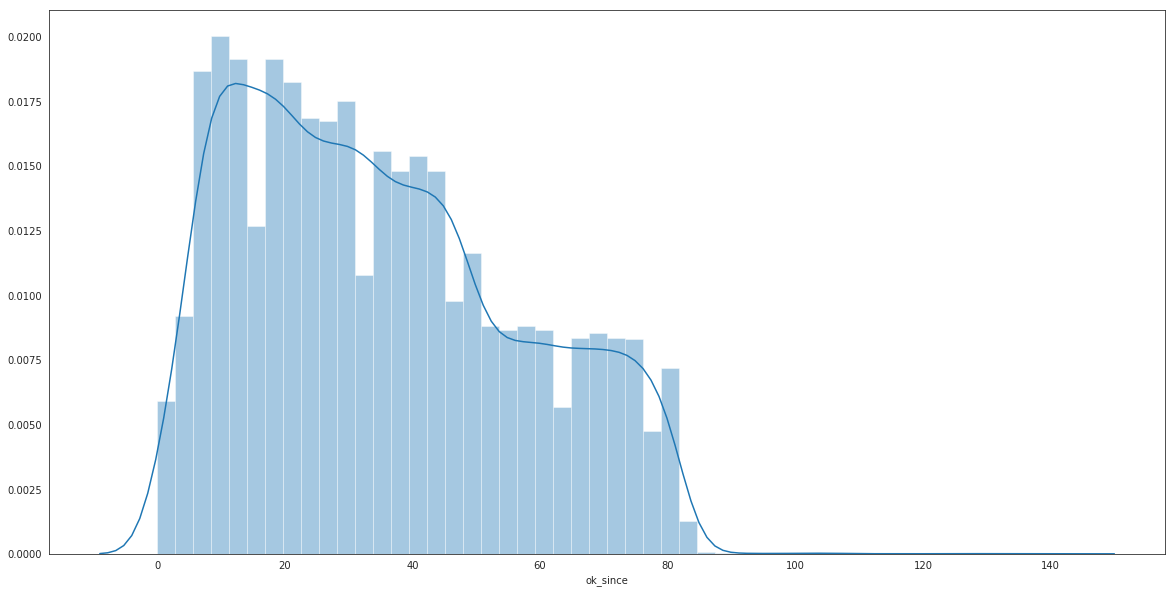

In [57]:
sns.distplot(data[colname].dropna())

## 17. n_bankruptcies

Quantidade de bancarrotas que o aplicante já experimentou

In [58]:
colname = 'n_bankruptcies'
data[colname].isna().sum()

987

In [59]:
data[colname].describe()

count    63605.000000
mean         0.076959
std          0.277000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: n_bankruptcies, dtype: float64

In [60]:
data[colname].value_counts().head()

0.0    58835
1.0     4679
2.0       71
3.0       12
4.0        4
Name: n_bankruptcies, dtype: int64

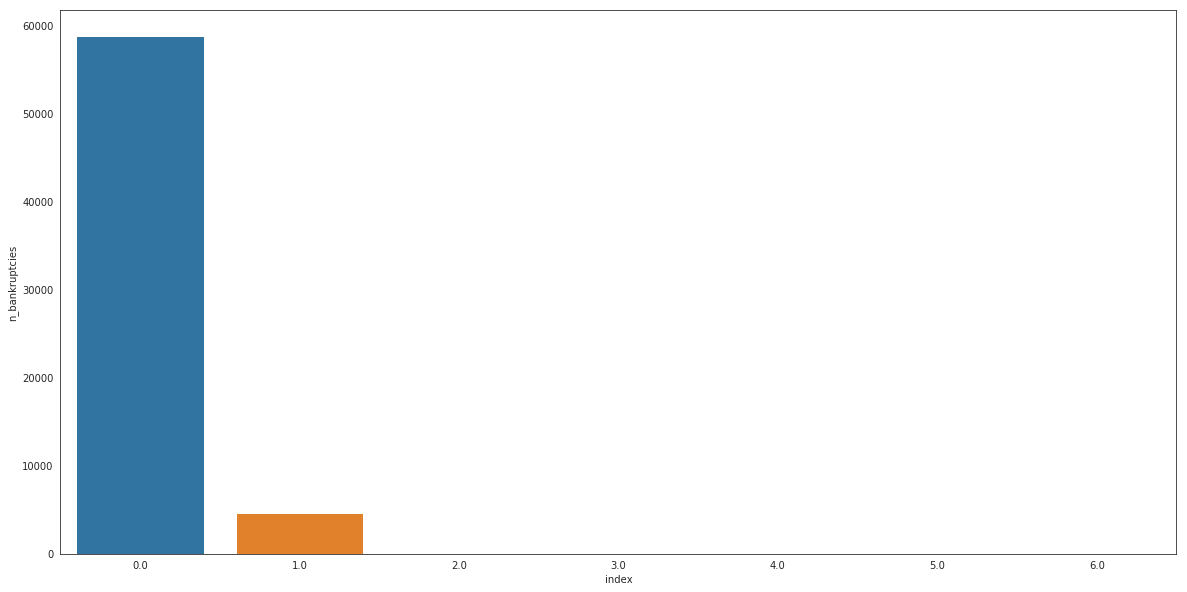

In [61]:
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

## 18. n_defaulted_loans

Quantidade de empréstimos não pagos no passado

In [62]:
colname = 'n_defaulted_loans'
data[colname].isna().sum()

803

In [63]:
data[colname].describe()

count    63789.000000
mean         0.004703
std          0.079048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: n_defaulted_loans, dtype: float64

In [64]:
data[colname].value_counts().head()

0.0    63529
1.0      227
2.0       28
3.0        4
5.0        1
Name: n_defaulted_loans, dtype: int64

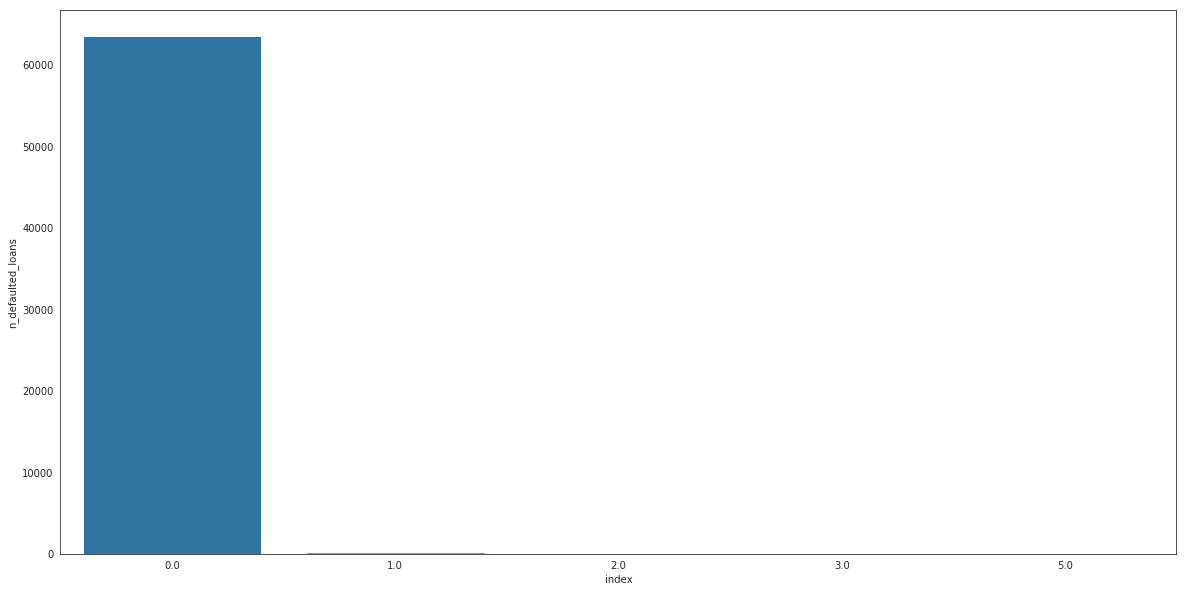

In [65]:
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

## 19. n_accounts

Número de contas que o aplicante possui

In [66]:
colname = 'n_accounts'
data[colname].isna().sum()

785

In [67]:
data[colname].describe()

count    63807.000000
mean        10.681164
std          4.583902
min          0.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         49.000000
Name: n_accounts, dtype: float64

In [68]:
data[colname].value_counts().head()

9.0     6251
8.0     6033
10.0    6019
7.0     5494
11.0    5399
Name: n_accounts, dtype: int64

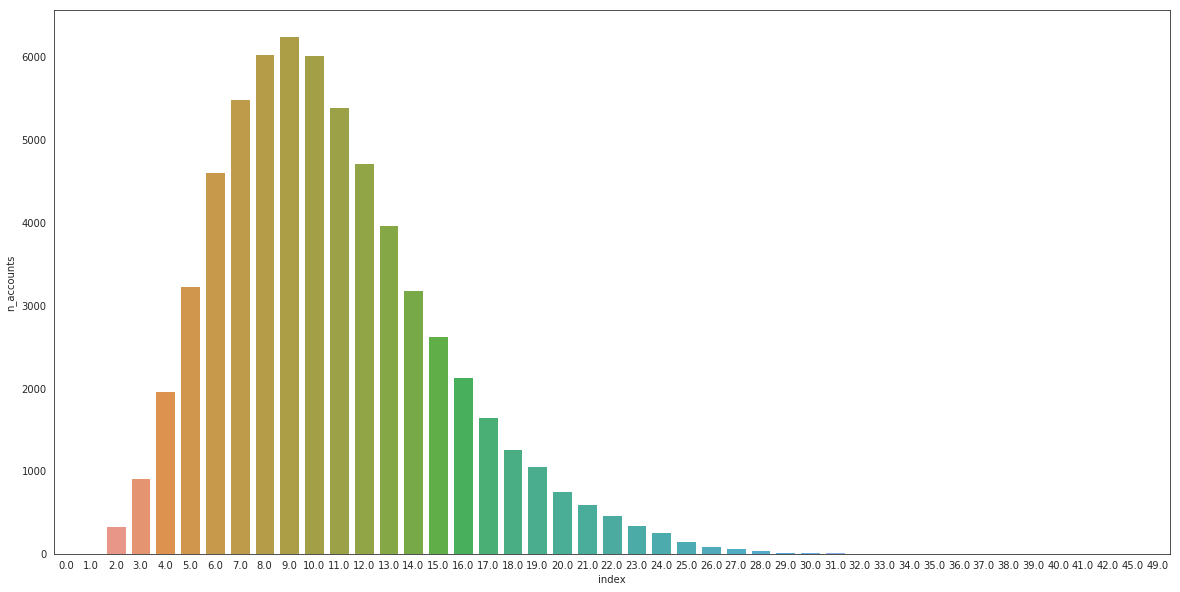

In [69]:
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

## 20. n_issues

Quantidade de empréstimos não pagos no passado

* muito parecido com n_accounts

In [70]:
colname = 'n_issues'
data[colname].isna().sum()

16451

In [71]:
data[colname].describe()

count    48141.000000
mean        11.044847
std          4.576030
min          0.000000
25%          8.000000
50%         10.000000
75%         14.000000
max         49.000000
Name: n_issues, dtype: float64

In [72]:
data[colname].value_counts().head()

9.0     4766
10.0    4682
8.0     4541
11.0    4216
7.0     3898
Name: n_issues, dtype: int64

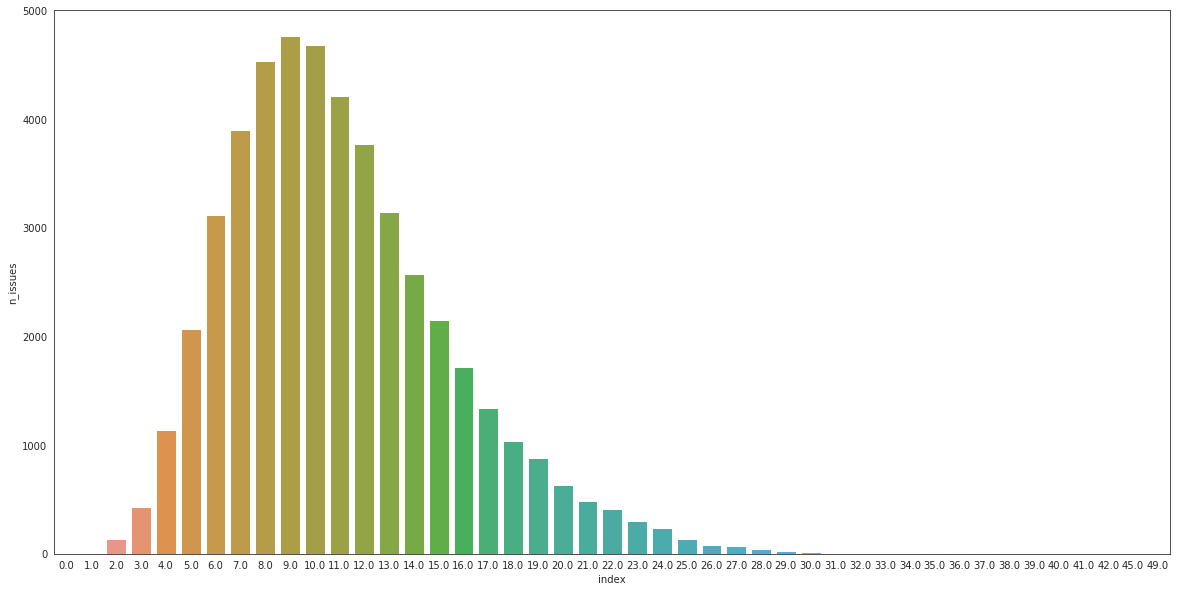

In [73]:
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

## 21. user_agent

Informação sobre dispositivo usado para a aplicação

* separar os/browser

In [74]:
colname = 'user_agent'
data[colname].isna().sum()

1040

In [75]:
data[colname].describe()

count                                                 63552
unique                                                  297
top       Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
freq                                                    266
Name: user_agent, dtype: object

In [76]:
data[colname].value_counts().head()

Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Build/32.2.A.0.253; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.364    266
Mozilla/5.0 (Linux; Android 7.0; Pixel C Build/NRD90M; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/52.0.2743.98 Safari/537.363           263
Mozilla/5.0 (Linux; Android 7.0; SM-T827R4 Build/NRD90M) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.116 Safari/537.368                        261
Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit/604.1.34 (KHTML, like Gecko) Version/11.0 Mobile/15A5341f Safari/604.18                 258
Mozilla/5.0 (Linux; Android 4.4.3; KFTHWI Build/KTU84M) AppleWebKit/537.36 (KHTML, like Gecko) Silk/47.1.79 like Chrome/47.0.2526.80 Safari/537.369        258
Name: user_agent, dtype: int64

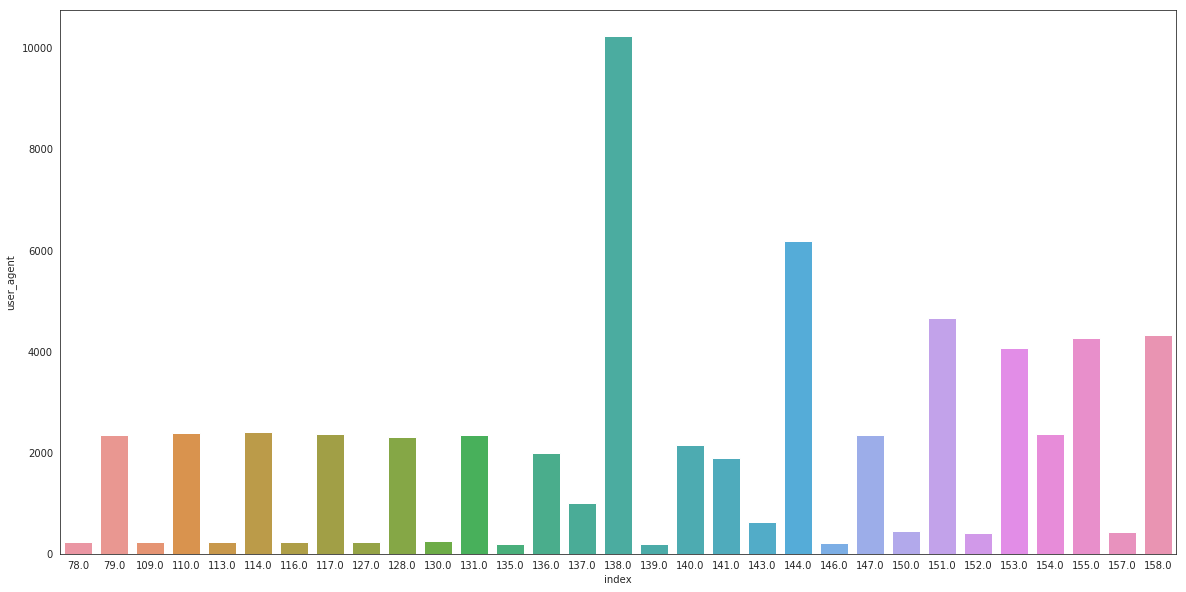

In [77]:
sns.barplot(x='index', y=colname, data=data[colname].str.len().value_counts().reset_index())

In [78]:
from ua_parser import user_agent_parser

In [79]:
ua_cols = ['user_agent_family',
 'user_agent_major',
 'user_agent_minor',
 'user_agent_patch',
 'os_family',
 'os_major',
 'os_minor',
 'os_patch',
 'os_patch_minor',
 'device_family',
 'device_brand',
 'device_model']
ua_cols_nan = list(np.full(len(ua_cols), np.nan))


def get_user_agent_infos(text):
    if pd.isna(text):
        return ua_cols_nan
    text = str(text)
    parsed_ua = user_agent_parser.Parse(text)
    ua_list = list(parsed_ua['user_agent'].values())
    ua_list.extend(list(parsed_ua['os'].values()))
    ua_list.extend(list(parsed_ua['device'].values()))
    return ua_list

In [80]:
user_agent_list = data.user_agent.apply(get_user_agent_infos)

In [81]:
user_agent_df = pd.DataFrame(user_agent_list.tolist(), columns=ua_cols, index=data.index)

In [82]:
data = pd.concat([data, user_agent_df], axis=1)

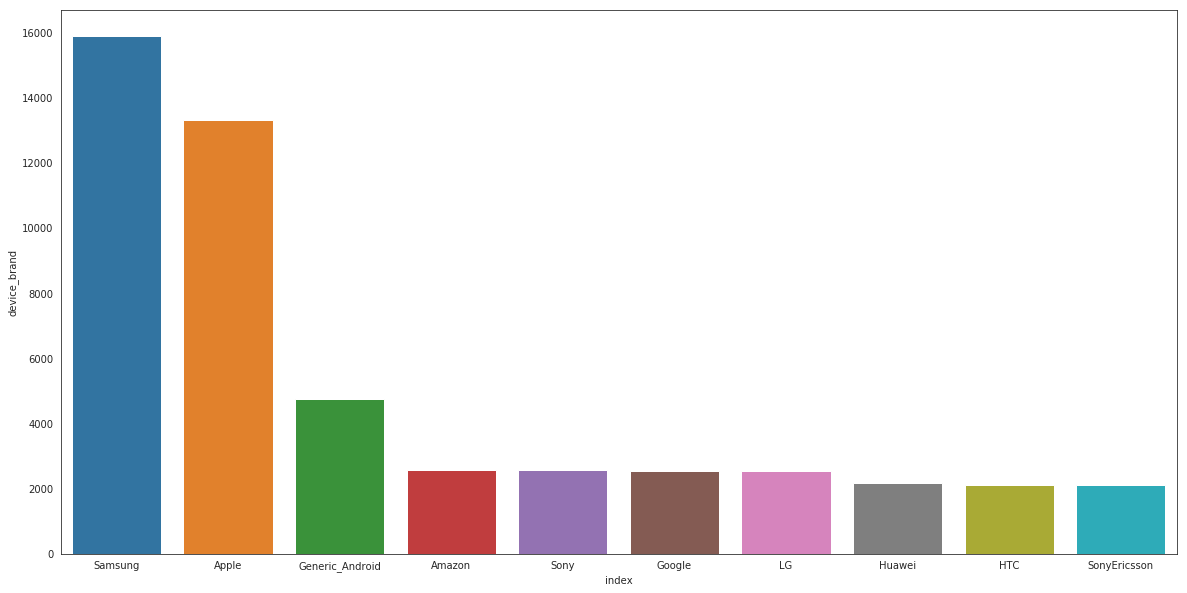

In [83]:
colname = 'device_brand'
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

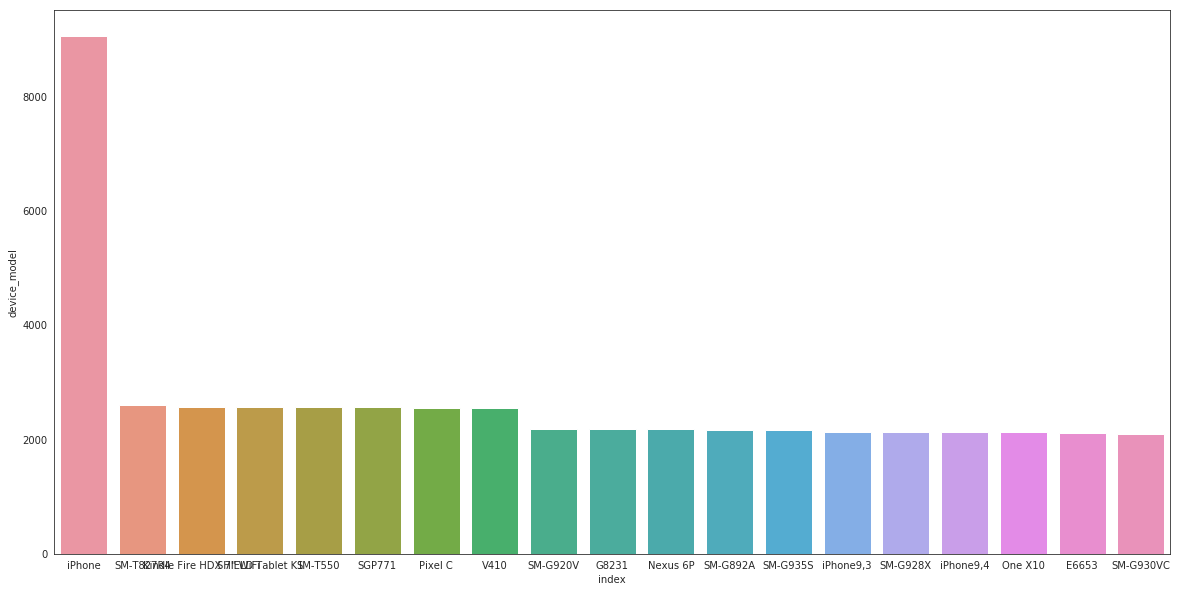

In [84]:
colname = 'device_model'
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

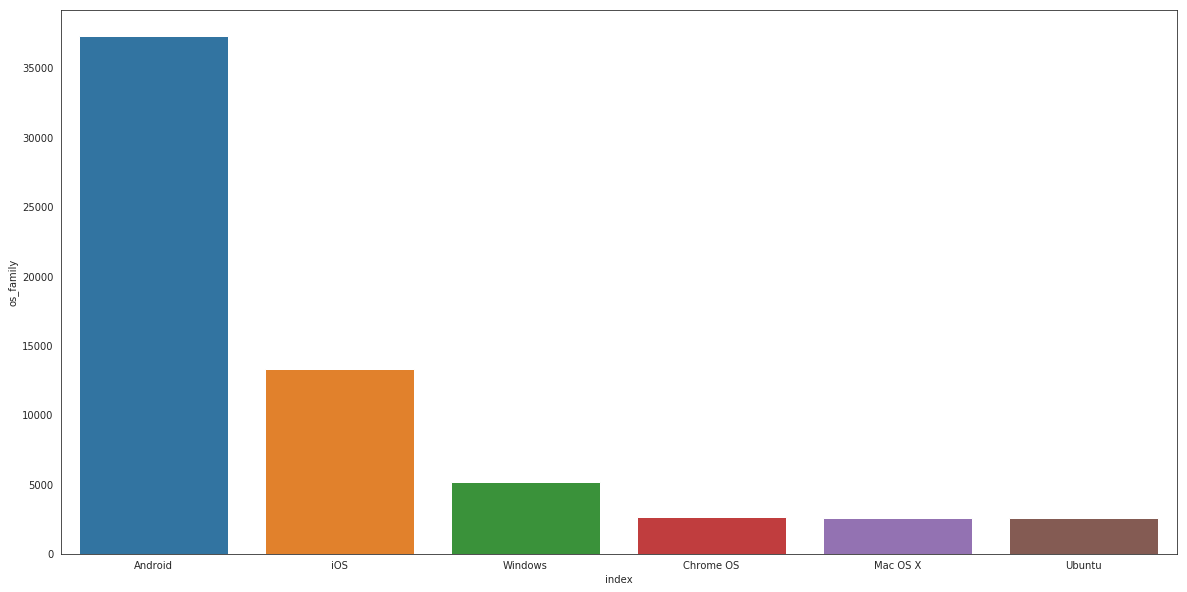

In [85]:
colname = 'os_family'
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

## 22. reported_income

Renda informada pelo próprio aplicante

In [86]:
colname = 'reported_income'
data[colname].isna().sum()

0

In [87]:
data[colname].describe()

count    6.459200e+04
mean              inf
std               NaN
min      4.030000e+02
25%      5.079850e+04
50%      1.017605e+05
75%      1.513790e+05
max               inf
Name: reported_income, dtype: float64

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


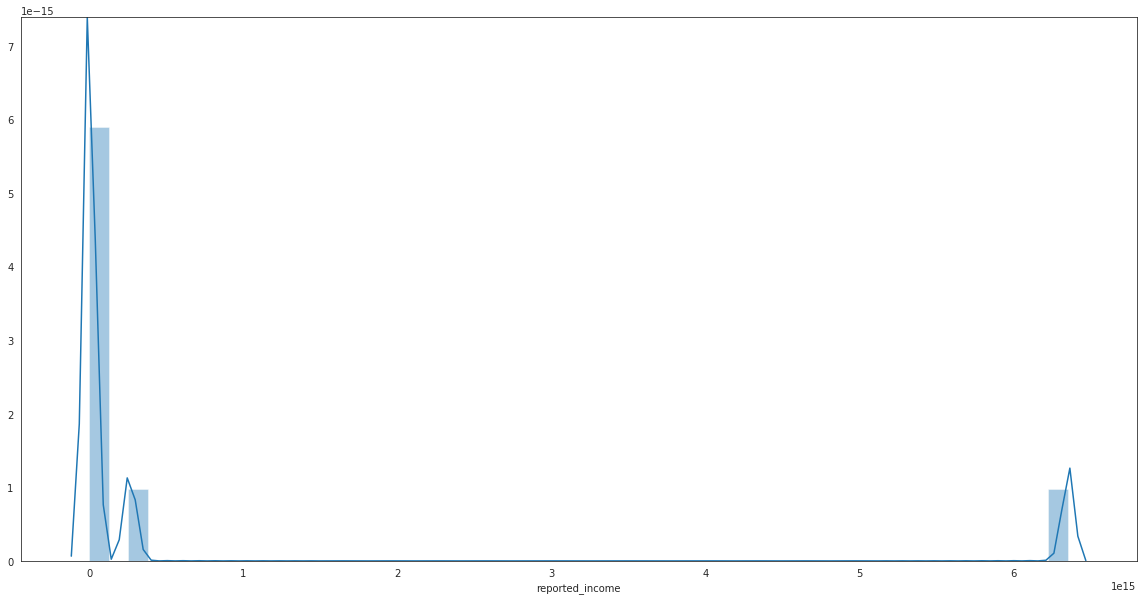

In [88]:
sns.distplot(data[colname].replace(np.inf, 1e+6).dropna().describe())

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


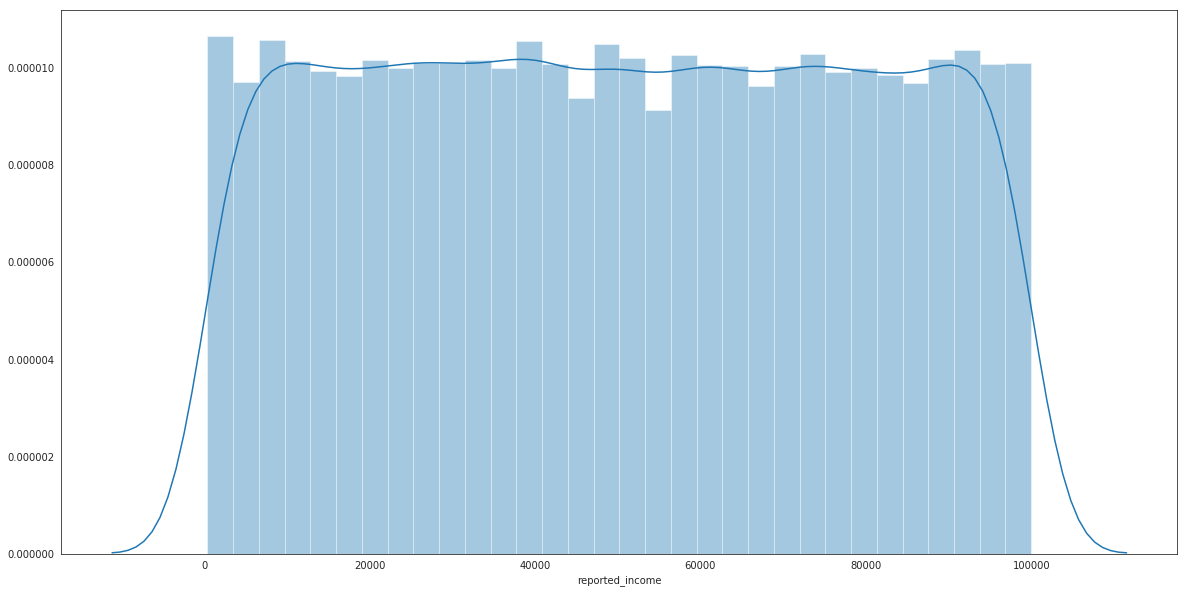

In [89]:
sns.distplot(data.reported_income[data.reported_income < 1e+5])

## 23. profile_phone_number

Número de telefone, ex: 210-2813414

In [90]:
colname = 'profile_phone_number'
data[colname].isna().sum()

0

In [91]:
data[colname].describe()

count           64592
unique          64591
top       120-9360307
freq                2
Name: profile_phone_number, dtype: object

In [92]:
phone_number_df = pd.DataFrame(data[colname].str.split('-',1).tolist(), 
                               columns = ['phone_number_pre','phone_number_post'])

In [93]:
phone_number_df.phone_number_pre.value_counts().head()

142    140
208    133
100    132
134    131
234    130
Name: phone_number_pre, dtype: int64

In [94]:
data[phone_number_df.phone_number_pre == '208'].state.value_counts().head()

xsd3ZdsI3356I3xMxZeiqQ==    28
sjJbkqJS7cXalHLBFA+EOQ==    10
kfFcVGcsJmH2n3eYprLkeQ==     8
1DpYl6dtzY0qE33poow3iw==     7
x6Gw/1I8t3KPgT6s82Kodg==     7
Name: state, dtype: int64

## 24. marketing_channel

Canal de marketing pelo qual o aplicante chegou na página de pedido de crédito

In [95]:
colname = 'marketing_channel'
data[colname].isna().sum()

5120

In [96]:
data[colname].describe()

count       59472
unique          9
top       Website
freq        15625
Name: marketing_channel, dtype: object

In [97]:
data[colname].value_counts()

Website             15625
Waiting-list        10076
Invite-web           5100
LinkedIn             4812
Facebook             4797
Instagram            4786
Twitter              4782
Radio-commercial     4775
Invite-email         4719
Name: marketing_channel, dtype: int64

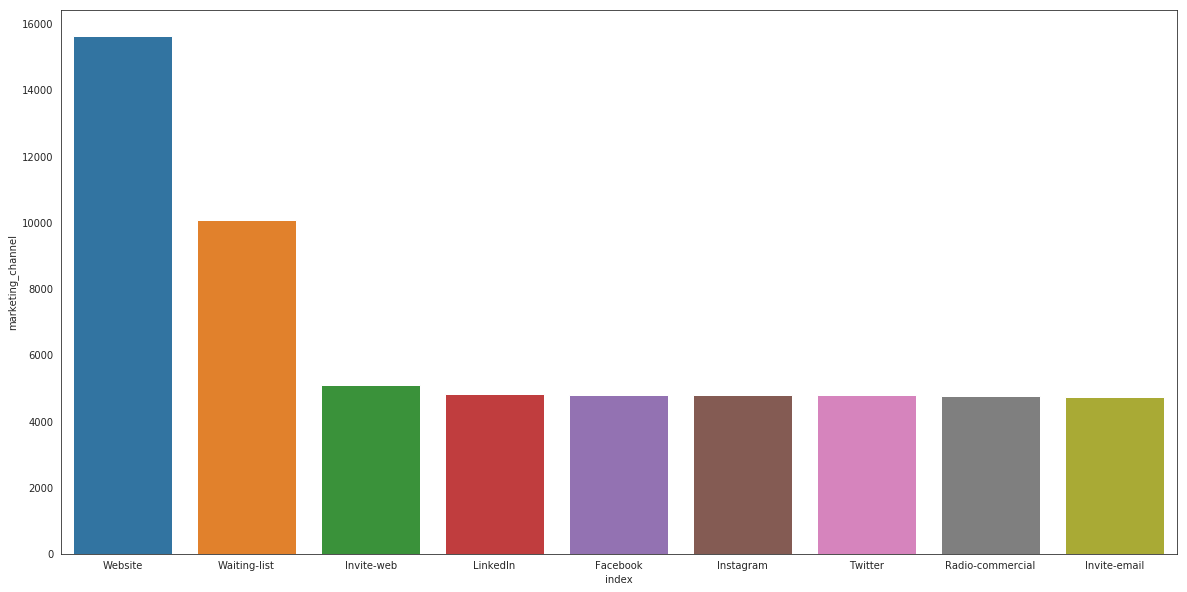

In [98]:
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

## 25. lat_lon

Latitude e longitude da localização

In [99]:
colname = 'lat_lon'
data[colname].isna().sum()

1965

In [100]:
test = data.iloc[1:4000]

In [101]:
notna_idxs = data.index[data.lat_lon.notna()]

In [102]:
data[['latitude', 'longitude']] = (data[colname].str.replace(r'[() ]', '').str.
                                   split(',', expand=True).apply(pd.to_numeric))

In [103]:
data.lat_lon.iloc[1]

'(-19.687710705798963, -47.94151536525154)'

In [104]:
rg_list = data.iloc[notna_idxs][['latitude', 'longitude']].apply(tuple, axis=1).tolist()

In [105]:
import reverse_geocoder as rg

In [106]:
coords_info = rg.search(rg_list)

Loading formatted geocoded file...


In [107]:
city_state_df = pd.DataFrame([[*x.values()][2:4] for x in coords_info],
                             columns=['lat_lon_city', 'lat_lon_state'],
                             index=notna_idxs)

In [108]:
data = pd.concat([data, city_state_df], axis=1)

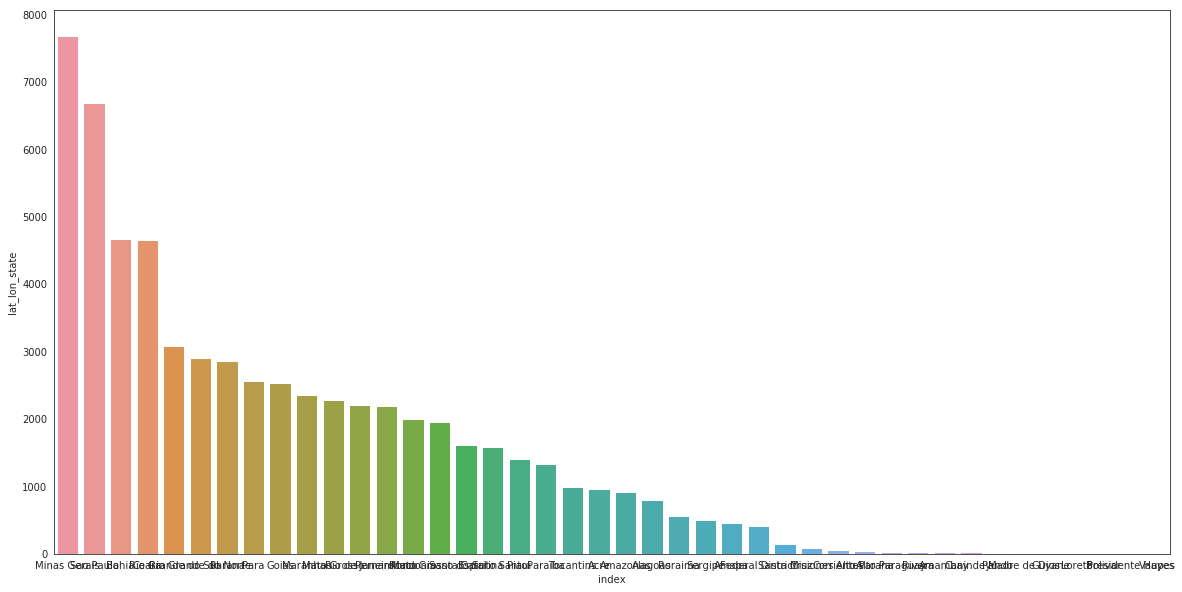

In [109]:
sns.barplot(x='index', y='lat_lon_state', data=data['lat_lon_state'].value_counts().reset_index())

In [110]:
data[data.lat_lon_state == 'Goias'].shipping_state.value_counts()

BR-SP    403
BR-AM    231
BR-GO    158
BR-BA    157
BR-MA     85
BR-RR     84
BR-ES     84
BR-SE     81
BR-MS     81
BR-TO     79
BR-PR     78
BR-RO     78
BR-MG     77
BR-PB     76
BR-PE     76
BR-CE     74
BR-AL     73
BR-DF     72
BR-RS     72
BR-AC     71
BR-RN     70
BR-AP     70
BR-MT     70
BR-SC     67
BR-PA     61
Name: shipping_state, dtype: int64

## 26. external_data_provider_* (todos)

Informação sobre dispositivo usado para a aplicação

In [111]:
colnames = ['external_data_provider_credit_checks_last_2_year',
    'external_data_provider_credit_checks_last_month',
    'external_data_provider_credit_checks_last_year',
    'external_data_provider_email_seen_before',
    'external_data_provider_first_name',
    'external_data_provider_fraud_score']

In [112]:
data[colnames].isna().sum()

external_data_provider_credit_checks_last_2_year    32392
external_data_provider_credit_checks_last_month         0
external_data_provider_credit_checks_last_year      21743
external_data_provider_email_seen_before             3226
external_data_provider_first_name                       0
external_data_provider_fraud_score                      0
dtype: int64

In [113]:
data[colnames].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
external_data_provider_credit_checks_last_2_year,32200.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
external_data_provider_credit_checks_last_month,64592.0,1.497120,1.115530,0.0,1.0,1.0,2.0,3.0
external_data_provider_credit_checks_last_year,42849.0,0.503209,0.499996,0.0,0.0,1.0,1.0,1.0
external_data_provider_email_seen_before,61366.0,12.424127,126.854506,-999.0,11.0,27.0,43.0,59.0
external_data_provider_fraud_score,64592.0,501.065674,288.673565,0.0,251.0,503.0,750.0,1000.0


In [114]:
data[colnames].nunique()

external_data_provider_credit_checks_last_2_year        1
external_data_provider_credit_checks_last_month         4
external_data_provider_credit_checks_last_year          2
external_data_provider_email_seen_before               62
external_data_provider_first_name                   41792
external_data_provider_fraud_score                   1001
dtype: int64

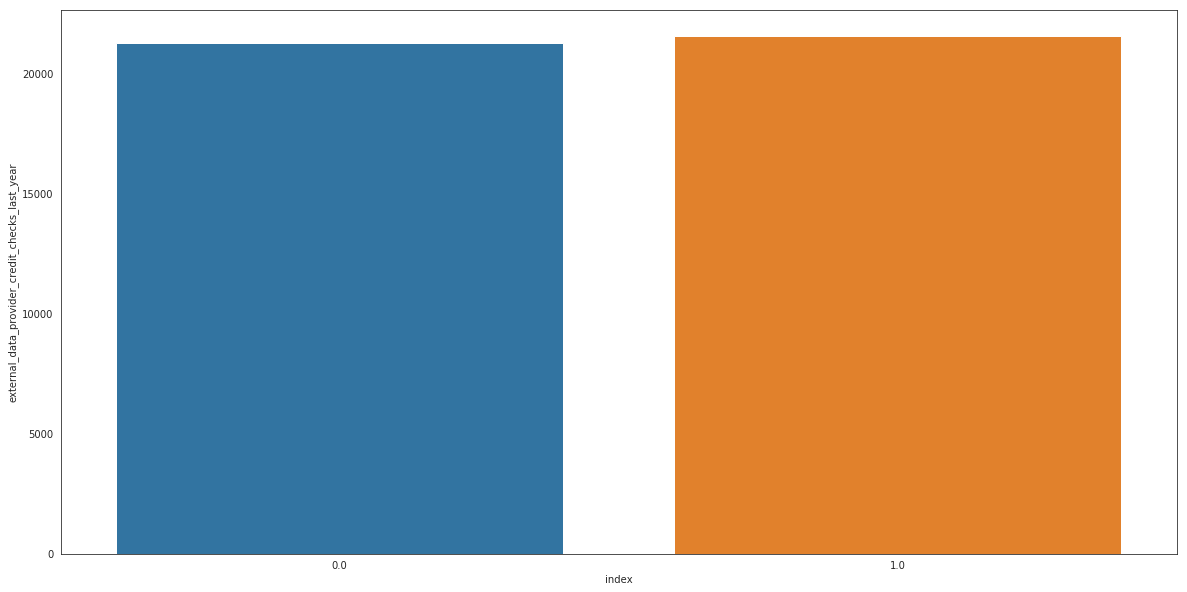

In [115]:
colname = 'external_data_provider_credit_checks_last_year'
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

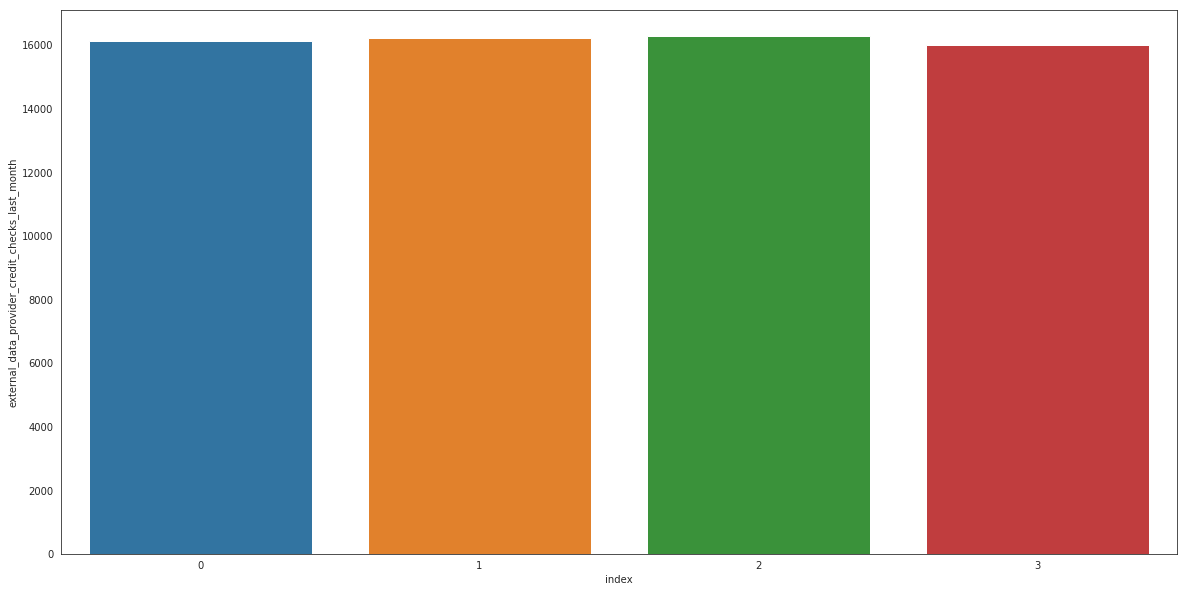

In [116]:
colname = 'external_data_provider_credit_checks_last_month'
sns.barplot(x='index', y=colname, data=data[colname].value_counts().reset_index())

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


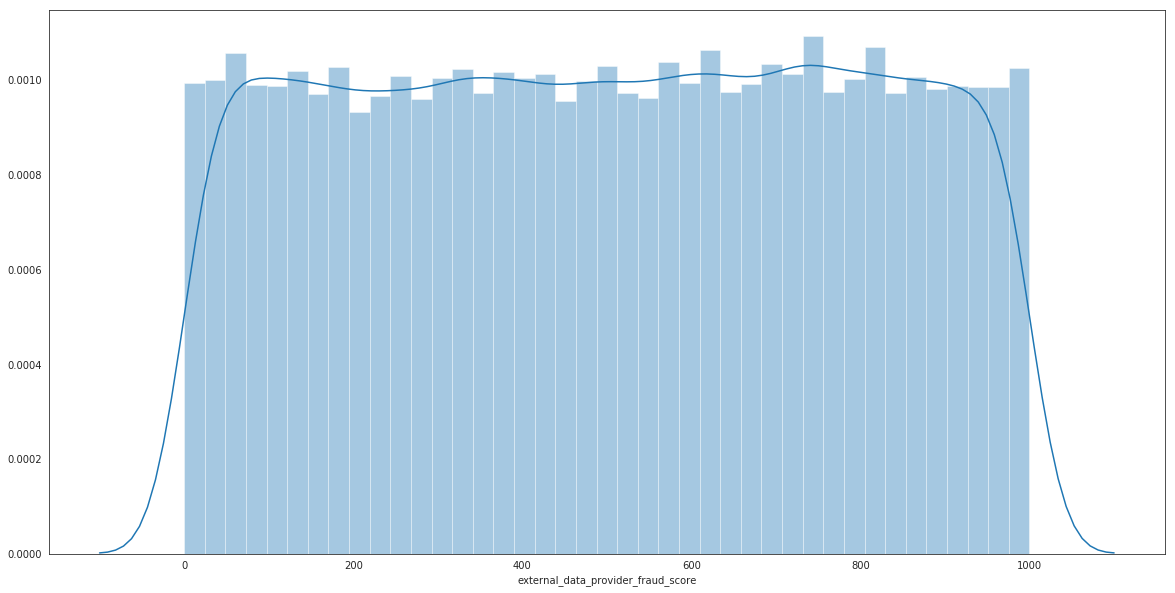

In [117]:
colname = 'external_data_provider_fraud_score'
sns.distplot(data[colname].dropna())

## 27. application_time_in_funnel

Tempo gasto pelo aplicante durante o processo de aplicação

In [118]:
colname = 'application_time_in_funnel'
data[colname].isna().sum()

0

In [119]:
data[colname].describe()

count    64592.000000
mean       247.296709
std        146.073105
min          0.000000
25%        120.000000
50%        248.000000
75%        374.000000
max        500.000000
Name: application_time_in_funnel, dtype: float64

/home/andre/.conda/envs/data-challenge/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


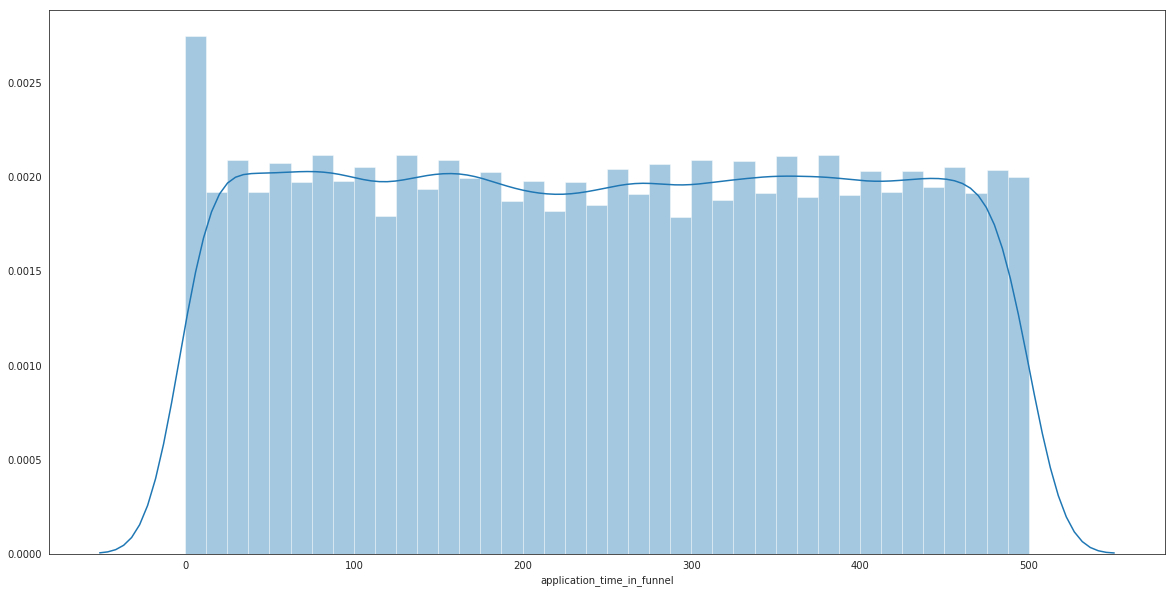

In [120]:
sns.distplot(data[colname].dropna())

## 28. application_time_applied

Horário de aplicação

In [121]:
colname = 'application_time_applied'
data[colname].isna().sum()

0

In [122]:
data[colname].describe()

count        64592
unique       46475
top       16:17:56
freq             6
Name: application_time_applied, dtype: object

In [123]:
# correct values

In [124]:
time_applied_df = data[colname].str.split(':', expand=True).apply(pd.to_numeric)
time_applied_df.columns = ['hour', 'minute', 'second']

In [125]:
time_applied_df.describe()

,hour,minute,second
count,64592.000000,64592.000000,64592.000000
mean,11.589454,30.091343,29.956496
std,7.297118,17.589990,17.600321
min,0.000000,0.000000,0.000000
25%,5.000000,15.000000,15.000000
50%,11.000000,30.000000,30.000000
75%,18.000000,45.000000,45.000000
max,24.000000,60.000000,60.000000


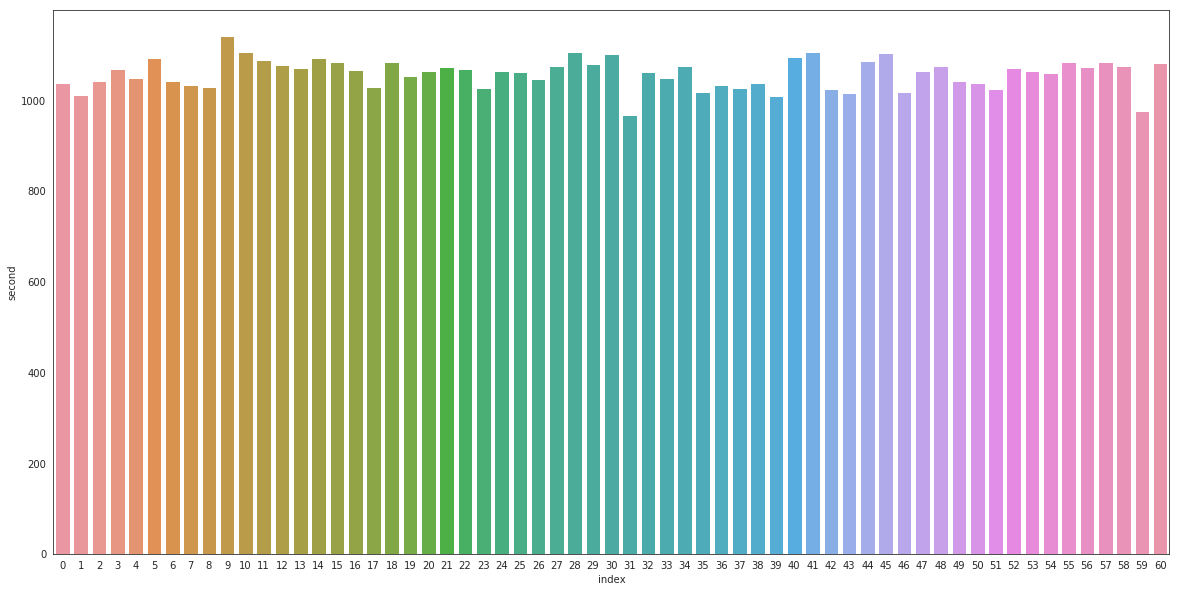

In [129]:
colname = 'second'
sns.barplot(x='index', y=colname, data=time_applied_df[colname].value_counts().reset_index())